# 1.Import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')
from tabulate import tabulate
import os
import time
import pickle
import textwrap
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
pd.options.display.max_rows=2200
from sklearn.model_selection import train_test_split, cross_validate, learning_curve, RandomizedSearchCV,GridSearchCV, StratifiedKFold, cross_val_score, cross_val_predict,KFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, make_scorer, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest, VotingClassifier
from xgboost import XGBClassifier

In [2]:
pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
train=pd.read_csv('KGtrain.csv')
test=pd.read_csv('KGtest.csv')

In [4]:
train.head()


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.4430,1.7000,81.6700,yes,yes,2.0000,2.9833,Sometimes,no,2.7636,no,0.0000,0.9765,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.0000,1.5600,57.0000,yes,yes,2.0000,3.0000,Frequently,no,2.0000,no,1.0000,1.0000,no,Automobile,Normal_Weight
2,2,Female,18.0000,1.7115,50.1658,yes,yes,1.8805,1.4117,Sometimes,no,1.9104,no,0.8660,1.6736,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.9527,1.7107,131.2749,yes,yes,3.0000,3.0000,Sometimes,no,1.6741,no,1.4679,0.7802,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.6411,1.9142,93.7981,yes,yes,2.6797,1.9715,Sometimes,no,1.9798,no,1.9680,0.9317,Sometimes,Public_Transportation,Overweight_Level_II


# 2.Data preparation

In [5]:
train.shape,test.shape

((20758, 18), (13840, 17))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

The data contains both the numerical and object data

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20758.0,10378.5000,5992.4628,0.00,5189.2500,10378.5000,15567.7500,20757.0000
Age,20758.0,23.8418,5.6881,14.00,20.0000,22.8154,26.0000,61.0000
Height,20758.0,1.7002,0.0873,1.45,1.6319,1.7000,1.7629,1.9757
Weight,20758.0,87.8878,26.3794,39.00,66.0000,84.0649,111.6006,165.0573
FCVC,20758.0,2.4459,0.5332,1.00,2.0000,2.3938,3.0000,3.0000
NCP,20758.0,2.7613,0.7054,1.00,3.0000,3.0000,3.0000,4.0000
CH2O,20758.0,2.0294,0.6085,1.00,1.7920,2.0000,2.5496,3.0000
FAF,20758.0,0.9817,0.8383,0.00,0.0080,1.0000,1.5874,3.0000
TUE,20758.0,0.6168,0.6021,0.00,0.0000,0.5739,1.0000,2.0000


The data contains some outliers as evident in the difference between the max and 75%

In [9]:
train.describe(include='object').T

,count,unique,top,freq
Gender,20758,2,Female,10422
family_history_with_overweight,20758,2,yes,17014
FAVC,20758,2,yes,18982
CAEC,20758,4,Sometimes,17529
SMOKE,20758,2,no,20513
SCC,20758,2,no,20071
CALC,20758,3,Sometimes,15066
MTRANS,20758,5,Public_Transportation,16687
NObeyesdad,20758,7,Obesity_Type_III,4046


In [10]:
train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Wow, no missing values


In [11]:
train=train.drop_duplicates()

In [12]:
test=test.drop_duplicates()


In [13]:
train.apply(lambda x: len(x.unique()))

id                                20758
Gender                                2
Age                                1703
Height                             1833
Weight                             1979
family_history_with_overweight        2
FAVC                                  2
FCVC                                934
NCP                                 689
CAEC                                  4
SMOKE                                 2
CH2O                               1506
SCC                                   2
FAF                                1360
TUE                                1297
CALC                                  3
MTRANS                                5
NObeyesdad                            7
dtype: int64

In [14]:
#CONCATENATING BOTH THE TEST AND TRAIN FOR EASY DATA MANIPULATON
ntrain = train.shape[0]
ntest = test.shape[0]
data = pd.concat((train, test)).reset_index(drop=True)
data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.4430,1.7000,81.6700,yes,yes,2.0000,2.9833,Sometimes,no,2.7636,no,0.0000,0.9765,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.0000,1.5600,57.0000,yes,yes,2.0000,3.0000,Frequently,no,2.0000,no,1.0000,1.0000,no,Automobile,Normal_Weight
2,2,Female,18.0000,1.7115,50.1658,yes,yes,1.8805,1.4117,Sometimes,no,1.9104,no,0.8660,1.6736,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.9527,1.7107,131.2749,yes,yes,3.0000,3.0000,Sometimes,no,1.6741,no,1.4679,0.7802,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.6411,1.9142,93.7981,yes,yes,2.6797,1.9715,Sometimes,no,1.9798,no,1.9680,0.9317,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,34593,Male,23.3278,1.7214,78.0304,yes,no,2.8132,3.0000,Sometimes,no,1.0000,no,0.8071,0.7786,Sometimes,Public_Transportation,NaN
34594,34594,Female,29.0000,1.5900,62.0000,no,yes,3.0000,3.0000,Sometimes,no,2.0000,no,0.0000,0.0000,Sometimes,Public_Transportation,NaN
34595,34595,Female,22.9356,1.5855,44.3766,no,yes,3.0000,2.2737,Frequently,no,2.0000,no,1.9498,1.0000,Sometimes,Public_Transportation,NaN
34596,34596,Male,21.0000,1.6200,53.0000,yes,yes,2.0000,3.0000,Sometimes,no,2.0000,no,3.0000,2.0000,no,Public_Transportation,NaN


#### Description of the data

In [15]:
description = [
    ["Gender", "Person's Gender"],
    ["Age", "Years old"],
    ["Height", "Height (meters)"],
    ["Weight", "Weight (Kilograms)"],
    ["family_history_with_overweight", "Yes/no question, to see if person has family history with overweight"],
    ["FAVC", "'Frequent consumption of high caloric food' - yes/no question, to see if person eats high caloric food frequently"],
    ["FCVC", "'Frequency of consumption of vegetables' Similar to FAVC but with vegetables (frequency)"],
    ["NCP", "'Number of main meals' NCP's value is 1, 2, 3, 4"],
    ["CAEC", "'Consumption of food between meals' takes 4 values (Always, Frequently, Sometimes, no)"],
    ["SMOKE", "Do you smoke?, yes/no question"],
    ["CH2O", "'Consumption of water daily' CH2O's values should be 1,2 or 3"],
    ["SCC", "'Calories consumption monitoring': Do you monitor your calories consumption?, yes/no question"],
    ["FAF", "'Physical activity frequency', ranged from 0 to 3 (float), where 0 means no physical activity and 3 means frequent activity"],
    ["TUE", "'Time using technology devices', such as smartphone or laptop - ranged from 0 to 2, where 0 means no devices used while 2 means high frequency of devices use"],
    ["CALC", "'Consumption of alcohol' takes 4 values: Always, Frequently, Sometimes, no"],
    ["MTRANS", "'Transportation used' MTRANS takes 5 values Public_Transportation, Automobile, Walking, Motorbike, & Bike"],
    ["NObeyesdad", "This is our target value, takes 7 values"]
]


description= pd.DataFrame(description, columns=["Column Name", "Description"])
description





,Column Name,Description
0,Gender,Person's Gender
1,Age,Years old
2,Height,Height (meters)
3,Weight,Weight (Kilograms)
4,family_history_with_overweight,"Yes/no question, to see if person has family history with overweight"
5,FAVC,"'Frequent consumption of high caloric food' - yes/no question, to see if person eats high caloric food frequently"
6,FCVC,'Frequency of consumption of vegetables' Similar to FAVC but with vegetables (frequency)
7,NCP,"'Number of main meals' NCP's value is 1, 2, 3, 4"
8,CAEC,"'Consumption of food between meals' takes 4 values (Always, Frequently, Sometimes, no)"
9,SMOKE,"Do you smoke?, yes/no question"


# EXPLORATORY DATA ANALYSIS

In [16]:
numerical_cols = [cname for cname in data.columns if data[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in data.columns if data[cname].dtype == "object" and cname != 'NObeyesdad']
# Printing numerical and categorical column lists
print('Numerical Columns: ', numerical_cols)
print('Categorical Columns: ', categorical_cols)

Numerical Columns:  ['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical Columns:  ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


### Distribution of categorical features

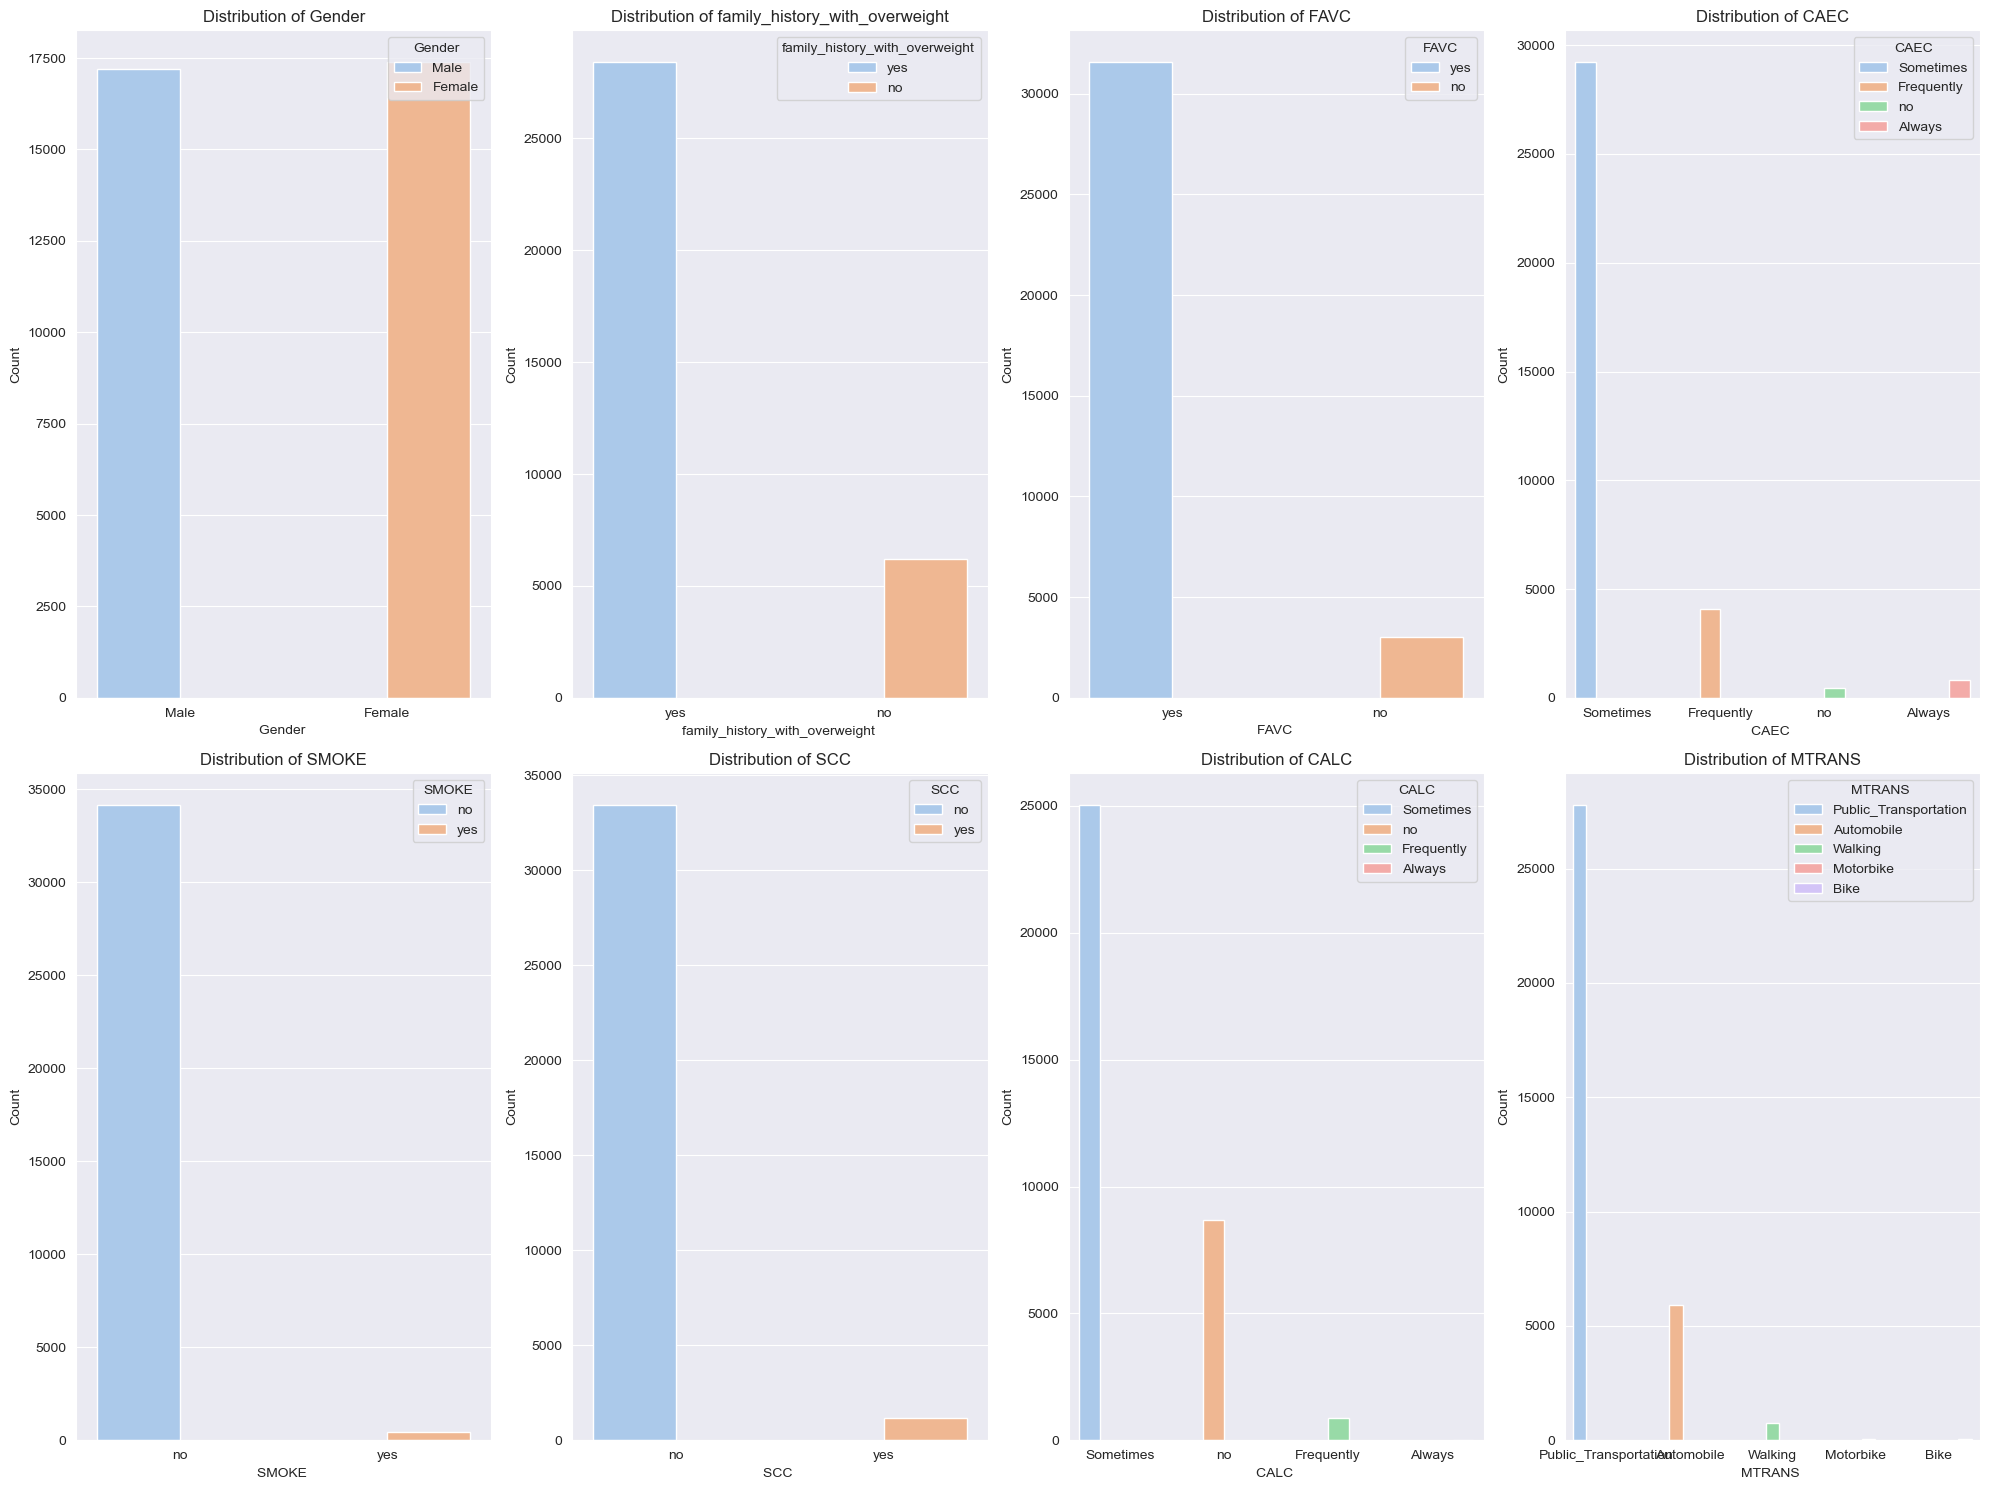

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(data[categorical_cols].columns):
    sns.countplot(x=column, data=data, ax=axes[i], hue=column, palette='pastel')
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(f"{column} ")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()


Majority of the categorical data are imbalanced with some classes being predominant compared to the others

#### Categorical Data vs Target

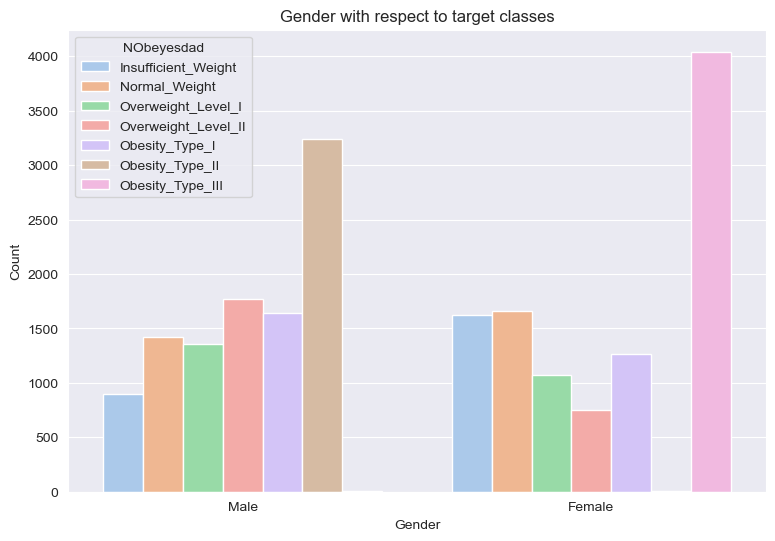

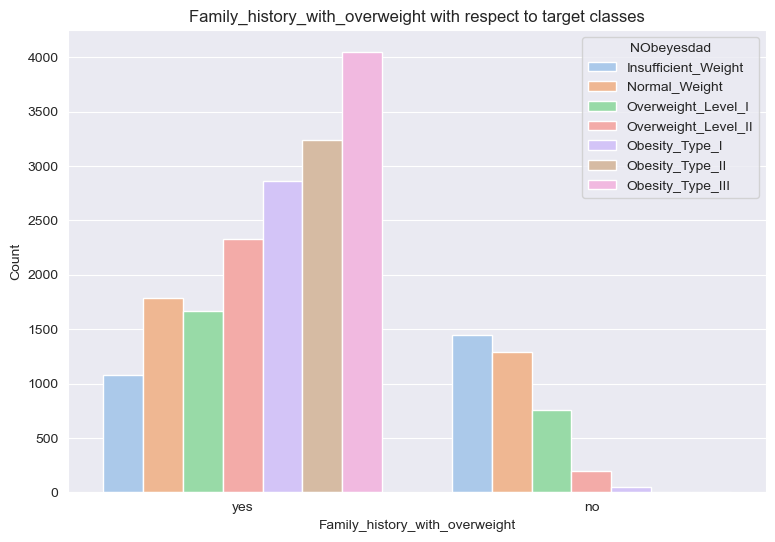

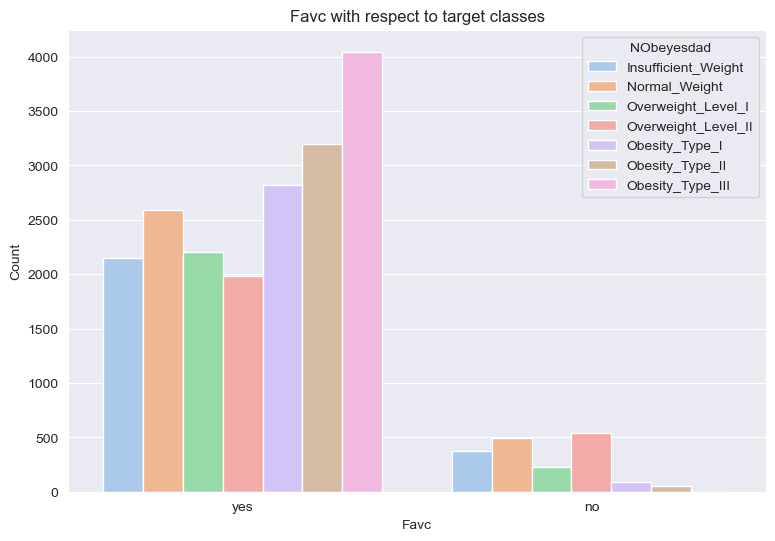

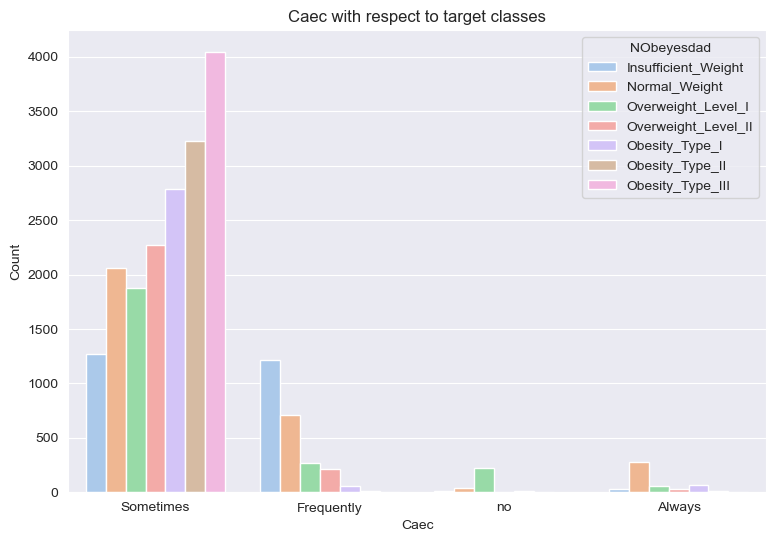

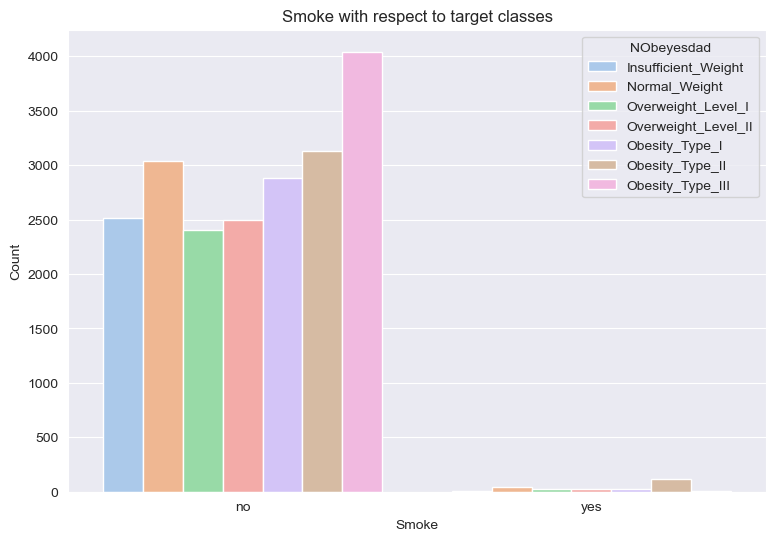

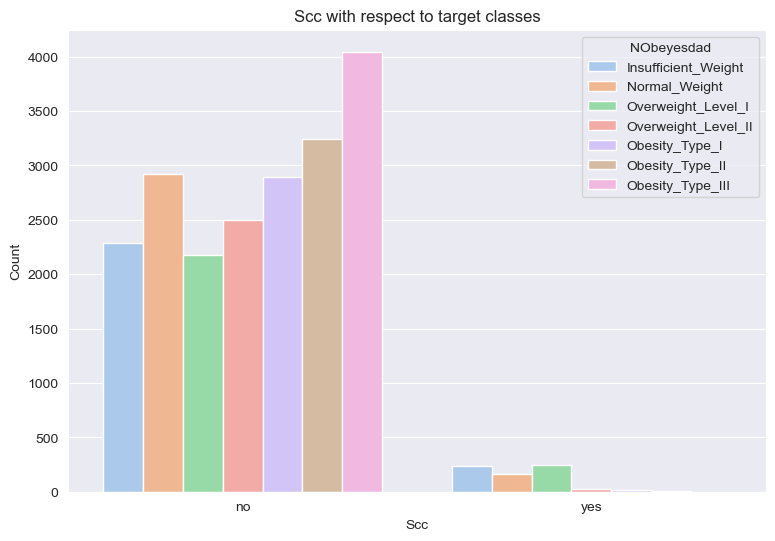

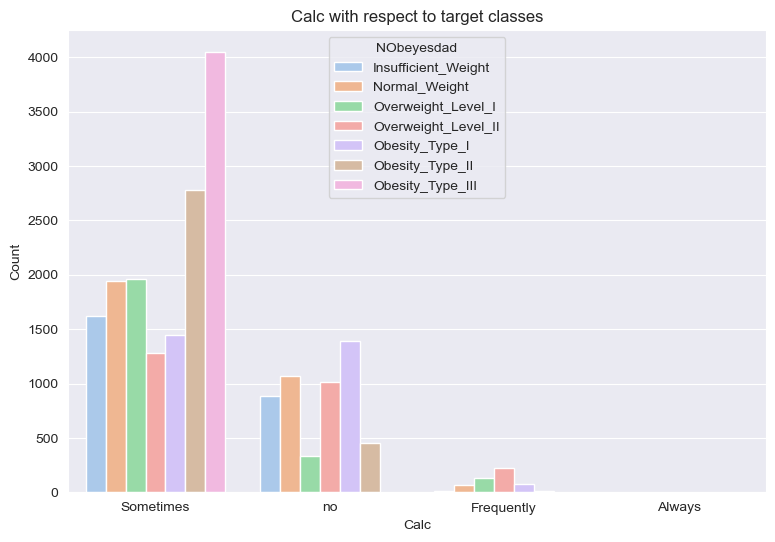

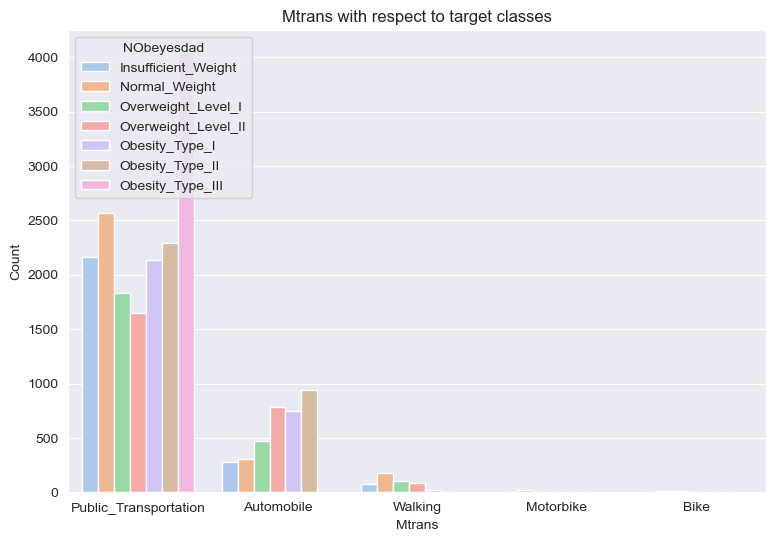

In [18]:
category_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
                      'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 
                      'Obesity_Type_III']

for col in categorical_cols:
    plt.figure(figsize=(9, 6))
    sns.countplot(data=data, x=col, hue='NObeyesdad', palette='pastel',hue_order=category_order)
    plt.title(f"{col.capitalize()} with respect to target classes")
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.legend(title='NObeyesdad')
    plt.show()

It is evident that most of  categorical variables have a high impact on the target class as evident on the count results.

## Distribution of numerical features

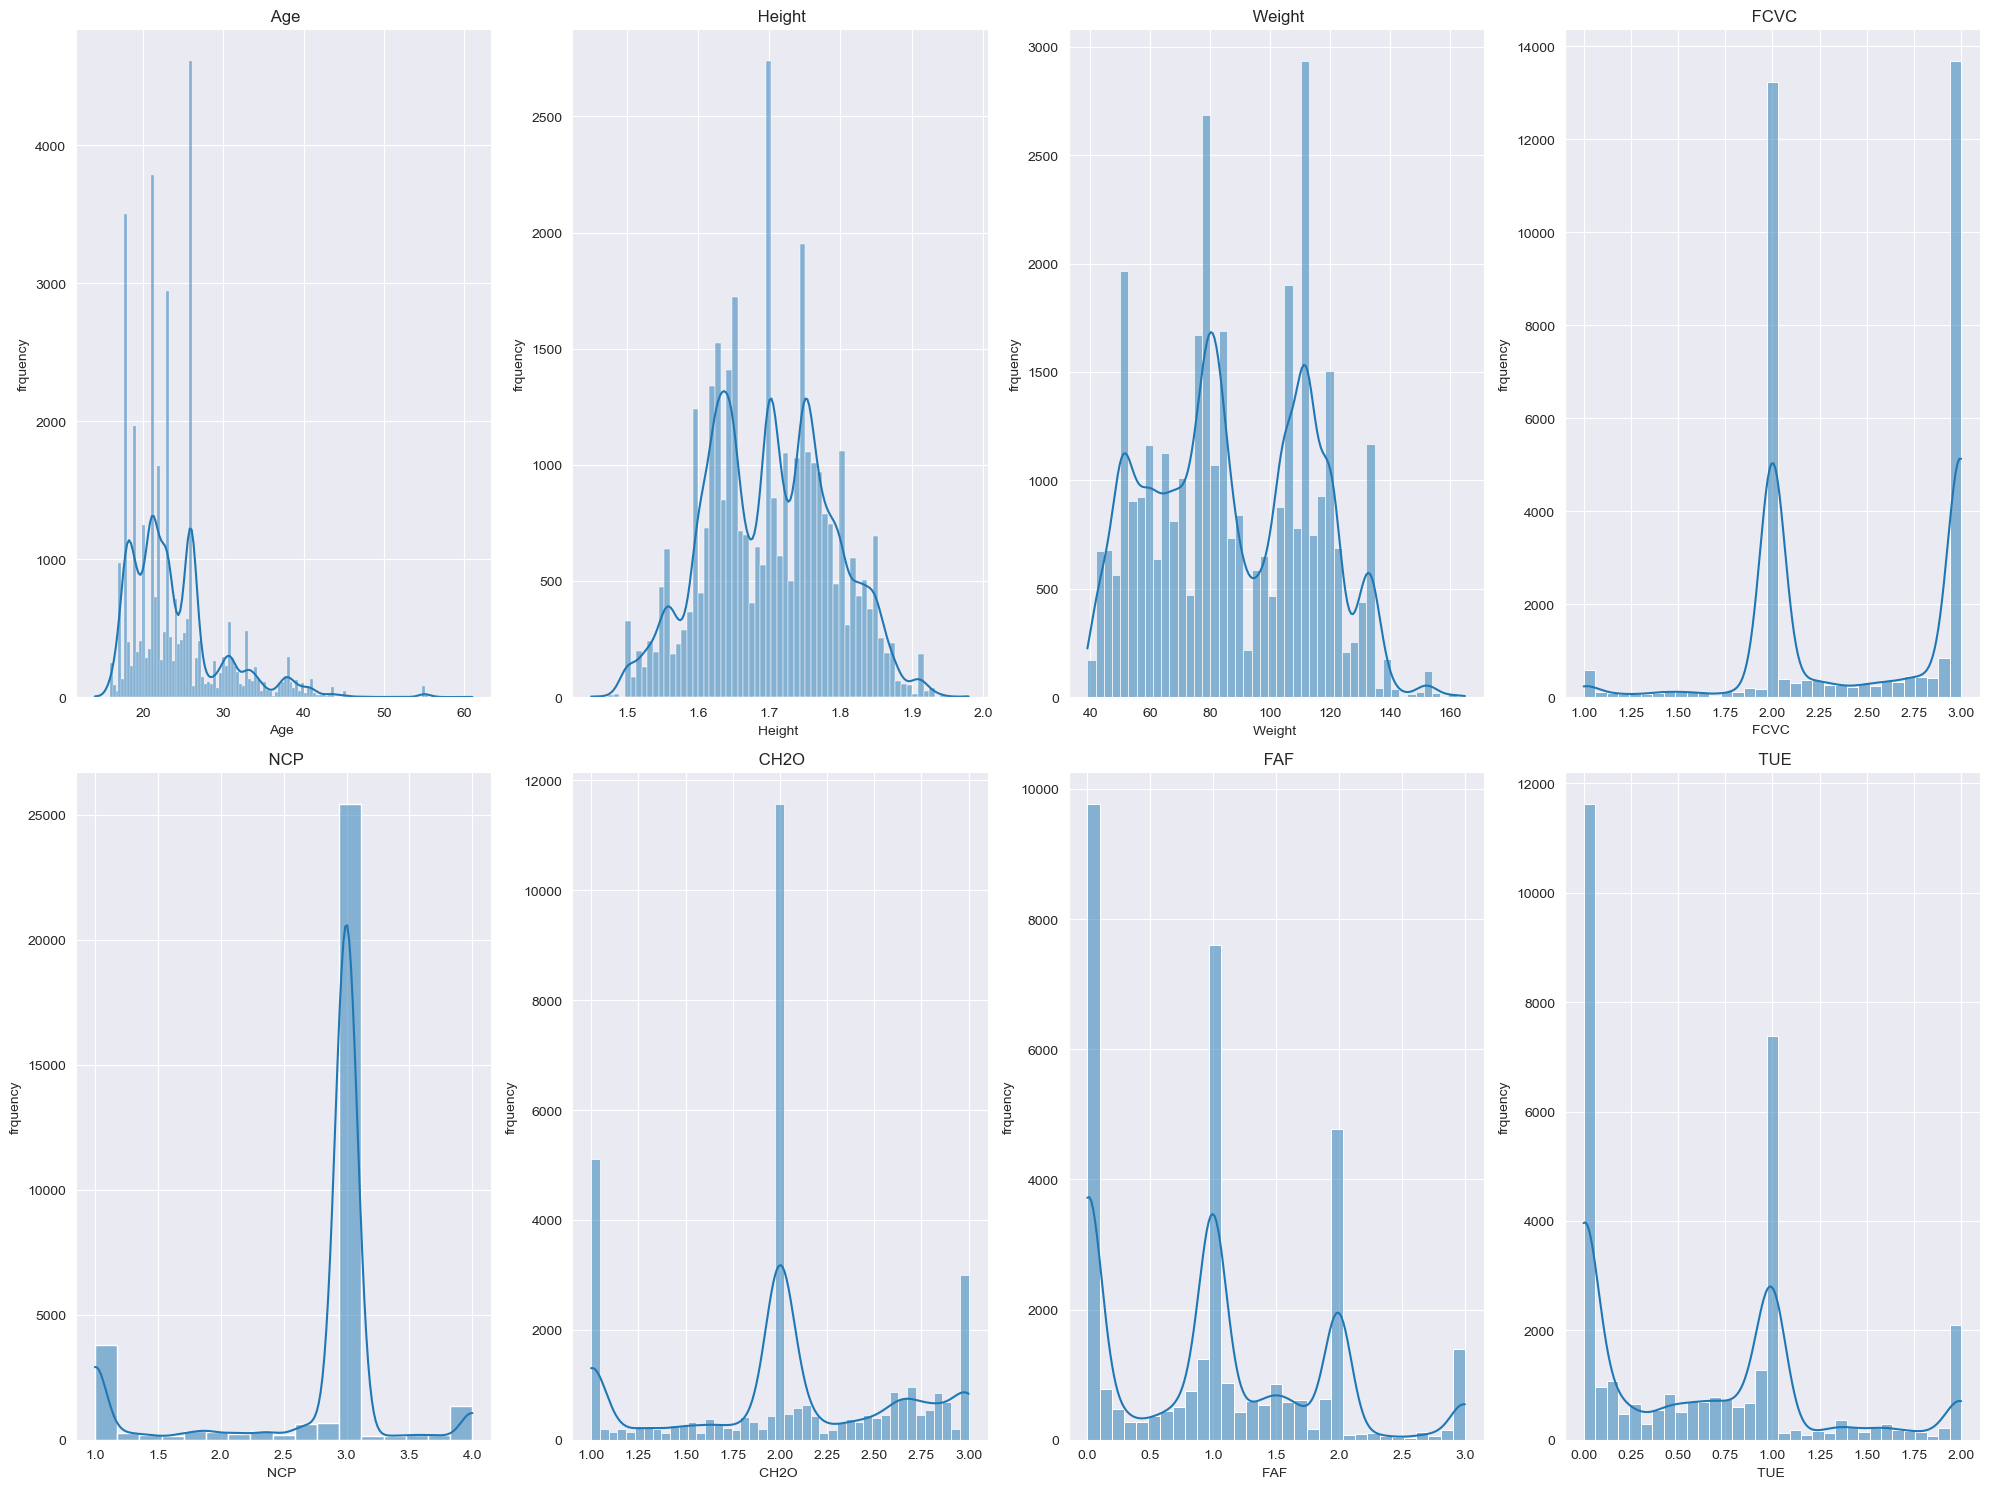

In [19]:
numerical_cols1 = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(data[numerical_cols1].columns):
    sns.histplot(x=column, data=data, ax=axes[i], kde=True, palette='pastel')
    axes[i].set_title(f" {column}")
    axes[i].set_xlabel(f"{column} ")
    axes[i].set_ylabel("frquency")

plt.tight_layout()
plt.show()


Height and weight are normally distributed while age is left skewed.

### Categorical Data vs Target

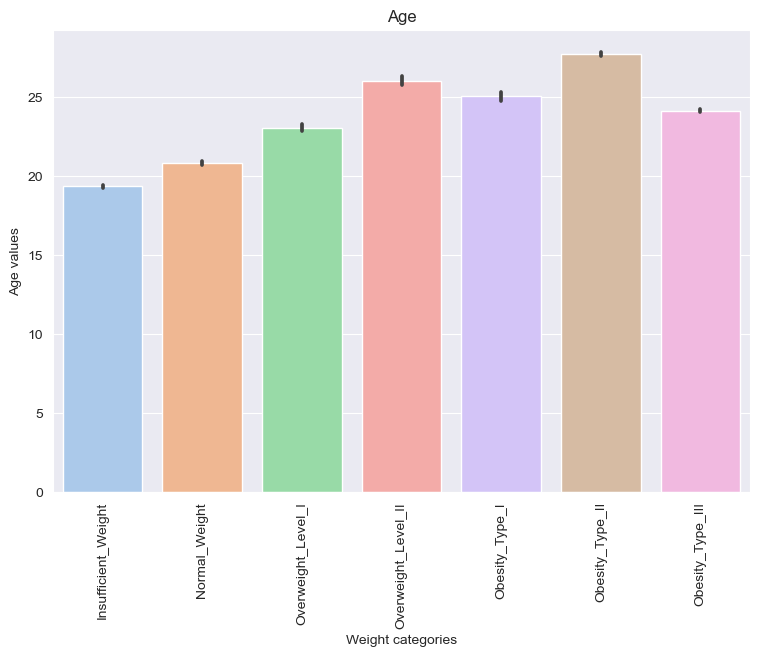

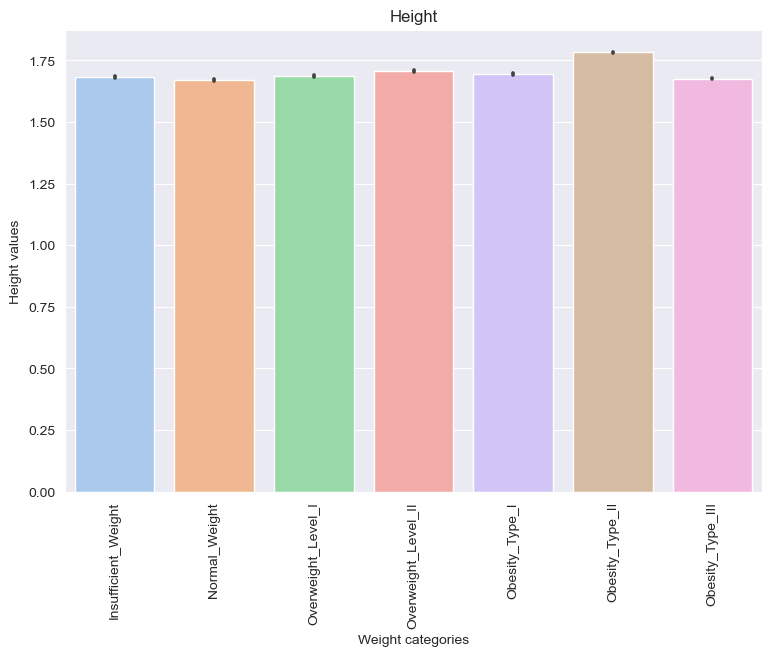

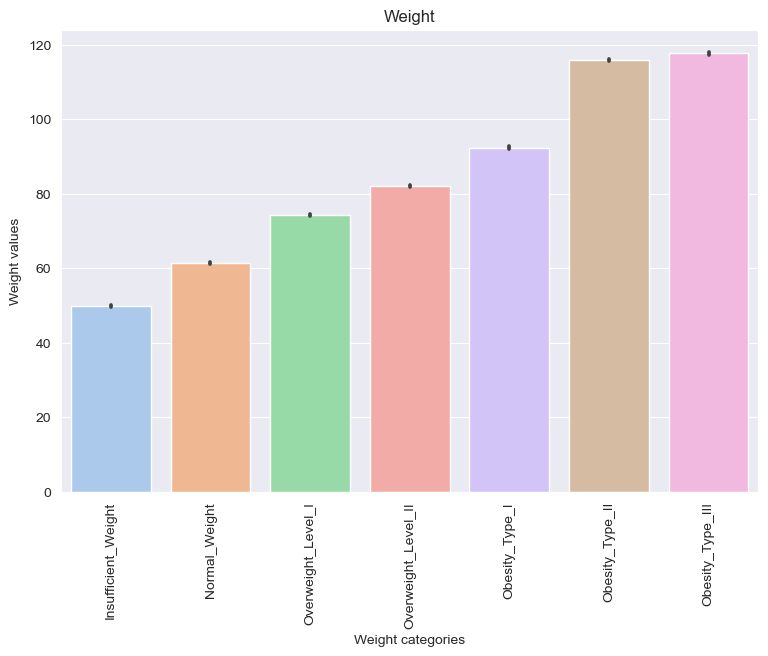

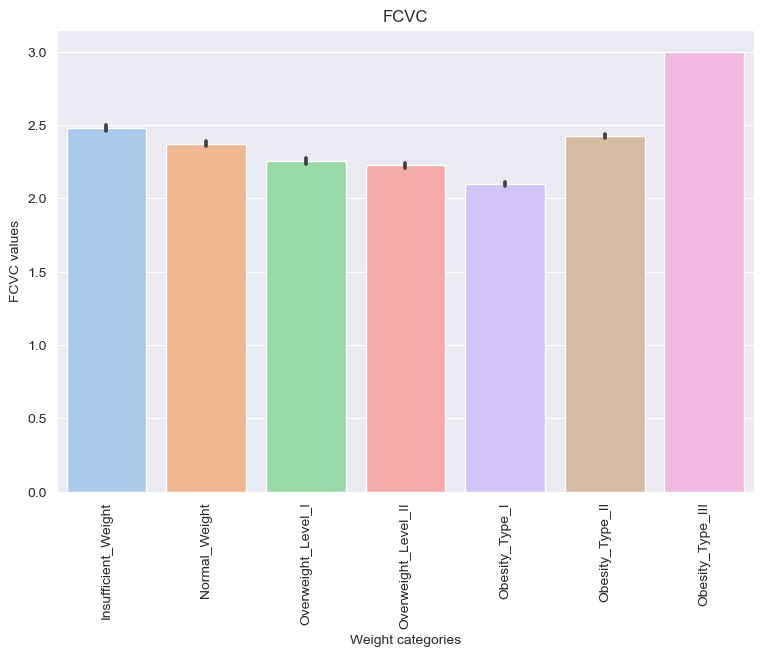

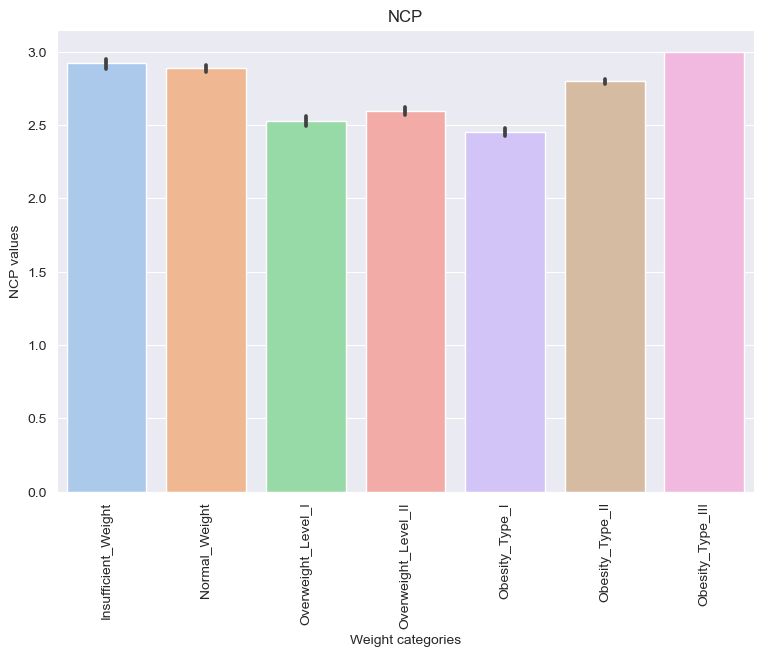

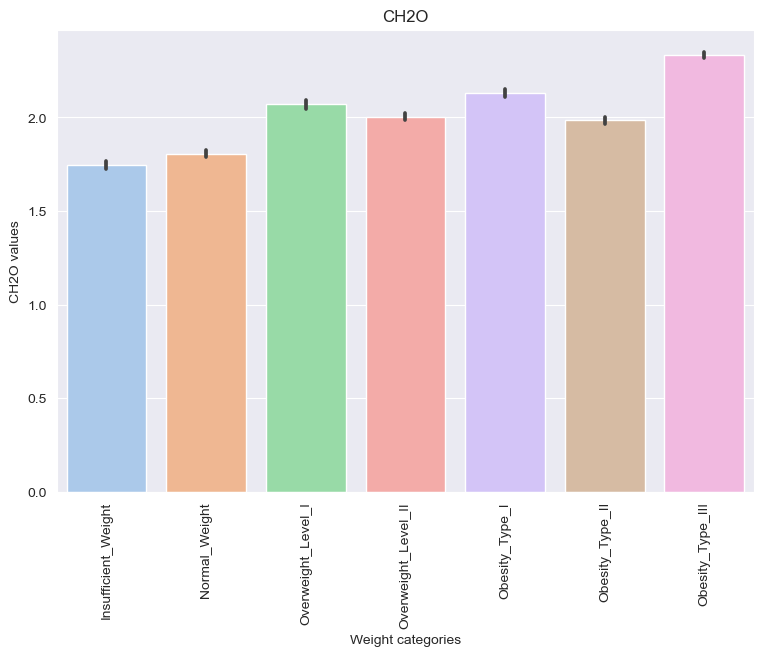

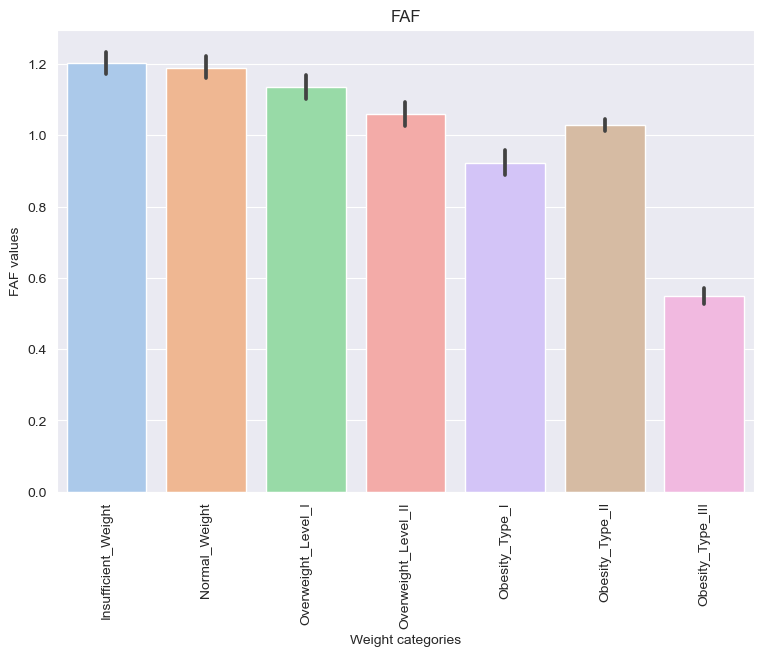

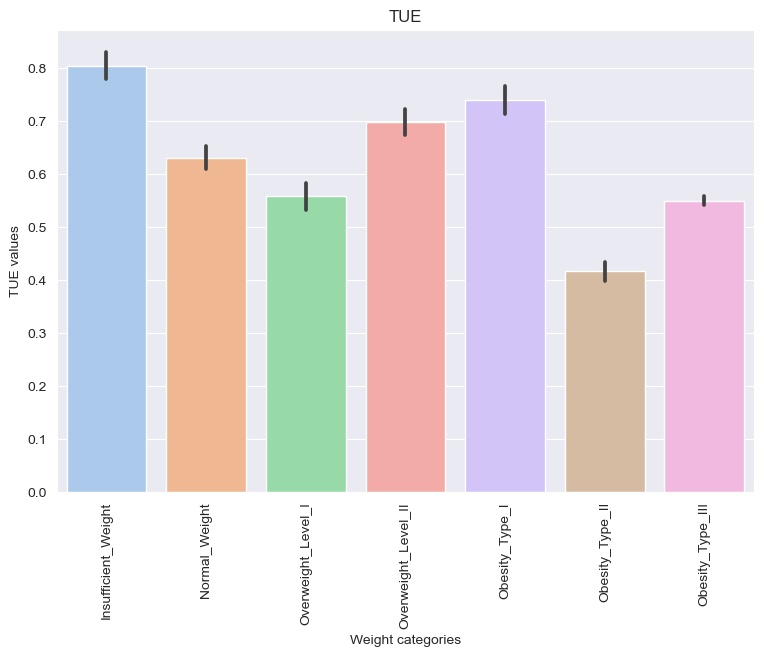

In [20]:
for col in numerical_cols1:
    plt.figure(figsize=(9,6))
    sns.barplot(x='NObeyesdad', y=col, data=data, palette='pastel', order = category_order)
    plt.xticks(rotation=90)
    plt.xlabel('Weight categories')
    plt.ylabel(f'{col} values')
    plt.title(f'{col}')
    
plt.show()

## Outlier detection for numerical columns

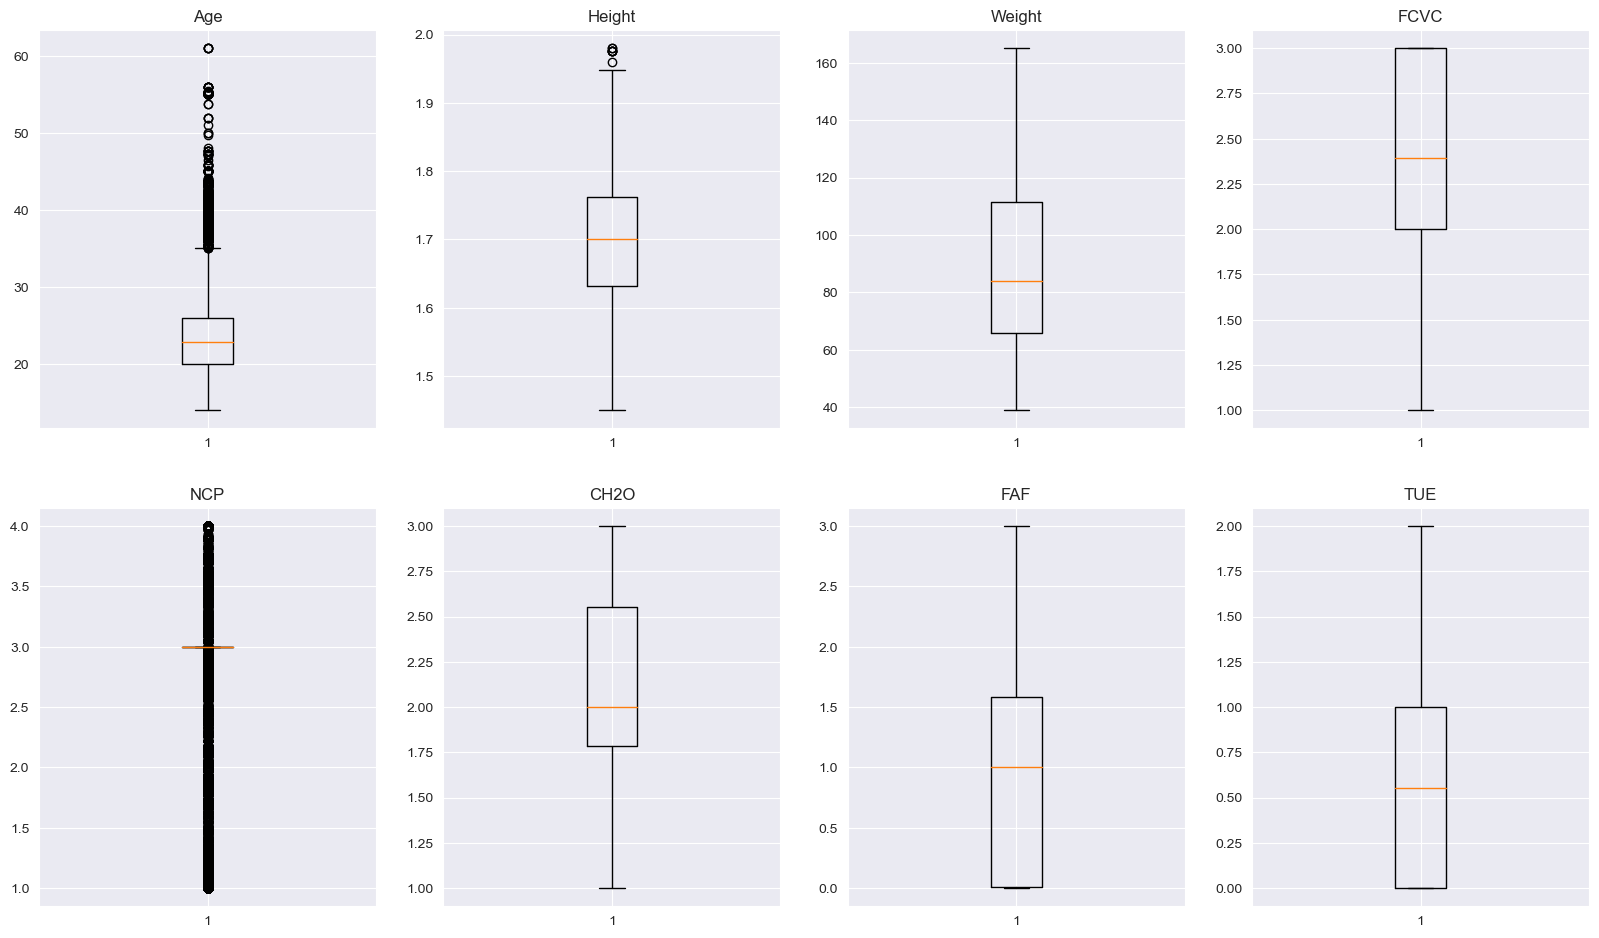

In [21]:
# Visualize the outliers using box plot
plt.figure(figsize=(20,30))
i = 1
columns_desc = ['Age', 'Height', 'Weight', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of water daily',
                'Physical activity frequency', 'Time using technology devices']
for col in numerical_cols1:
    plt.subplot(5, 4, i)
    plt.boxplot(data[col], whis=1.5)
    plt.title(f'{col}')
    i += 1

## Relationship between features

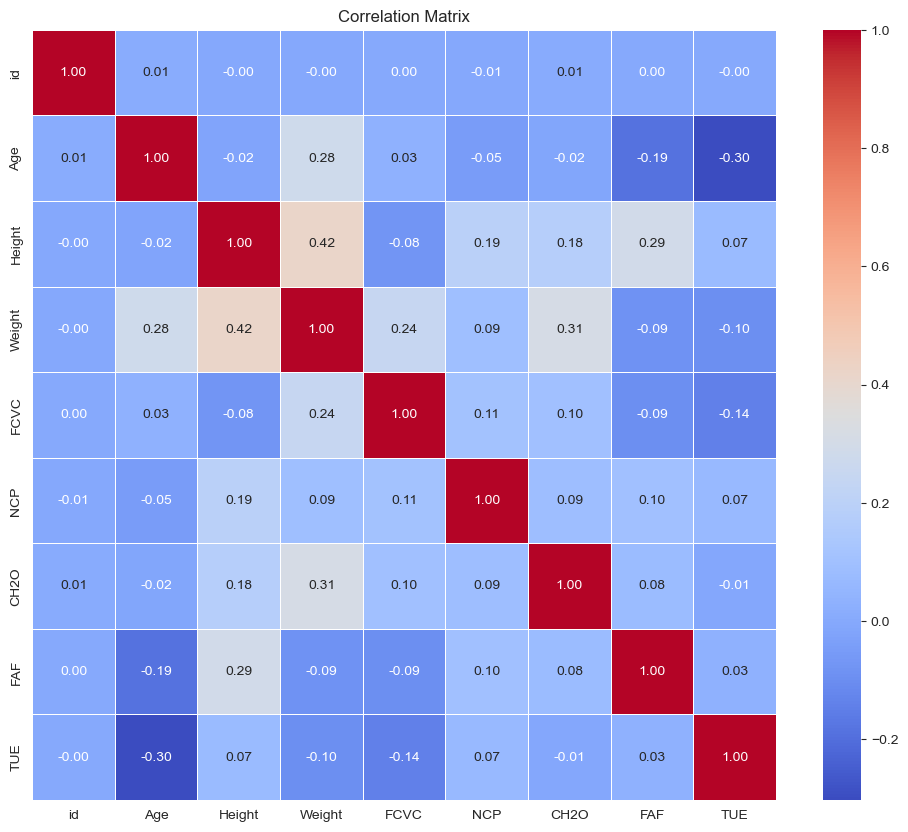

In [22]:
correlation_matrix = data.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


# Data preprocessing

## Encoding

In [23]:

# Encode target classes
mapping = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 
           'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 
           'Obesity_Type_III': 6}

# Create a new column for the encoded target variable
data['encoded_target'] = data['NObeyesdad'].map(mapping)
data.head()


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,encoded_target
0,0,Male,24.4430,1.7000,81.6700,yes,yes,2.0000,2.9833,Sometimes,no,2.7636,no,0.0000,0.9765,Sometimes,Public_Transportation,Overweight_Level_II,3.0
1,1,Female,18.0000,1.5600,57.0000,yes,yes,2.0000,3.0000,Frequently,no,2.0000,no,1.0000,1.0000,no,Automobile,Normal_Weight,1.0
2,2,Female,18.0000,1.7115,50.1658,yes,yes,1.8805,1.4117,Sometimes,no,1.9104,no,0.8660,1.6736,no,Public_Transportation,Insufficient_Weight,0.0
3,3,Female,20.9527,1.7107,131.2749,yes,yes,3.0000,3.0000,Sometimes,no,1.6741,no,1.4679,0.7802,Sometimes,Public_Transportation,Obesity_Type_III,6.0
4,4,Male,31.6411,1.9142,93.7981,yes,yes,2.6797,1.9715,Sometimes,no,1.9798,no,1.9680,0.9317,Sometimes,Public_Transportation,Overweight_Level_II,3.0


In [24]:
data= data.drop('NObeyesdad',axis=1)

### Pandas Get Dummies

In [25]:
data.describe(include='object').T

,count,unique,top,freq
Gender,34598,2,Female,17387
family_history_with_overweight,34598,2,yes,28398
FAVC,34598,2,yes,31565
CAEC,34598,4,Sometimes,29218
SMOKE,34598,2,no,34173
SCC,34598,2,no,33447
CALC,34598,4,Sometimes,25045
MTRANS,34598,5,Public_Transportation,27798


In [26]:
data = pd.get_dummies(data,columns=['Gender','family_history_with_overweight','FAVC','SMOKE','SCC'])

data.head(3)

    

,id,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,encoded_target,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes
0,0,24.443,1.7000,81.6700,2.0000,2.9833,Sometimes,2.7636,0.000,0.9765,Sometimes,Public_Transportation,3.0,0,1,0,1,0,1,1,0,1,0
1,1,18.000,1.5600,57.0000,2.0000,3.0000,Frequently,2.0000,1.000,1.0000,no,Automobile,1.0,1,0,0,1,0,1,1,0,1,0
2,2,18.000,1.7115,50.1658,1.8805,1.4117,Sometimes,1.9104,0.866,1.6736,no,Public_Transportation,0.0,1,0,0,1,0,1,1,0,1,0


### label encoding 

In [27]:
le = LabelEncoder()

le_columns = ['MTRANS']

## Count of unique features
for col in le_columns:
   data[col] = le.fit_transform(data[col])

In [28]:
data.head(3)

,id,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,encoded_target,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes
0,0,24.443,1.7000,81.6700,2.0000,2.9833,Sometimes,2.7636,0.000,0.9765,Sometimes,3,3.0,0,1,0,1,0,1,1,0,1,0
1,1,18.000,1.5600,57.0000,2.0000,3.0000,Frequently,2.0000,1.000,1.0000,no,0,1.0,1,0,0,1,0,1,1,0,1,0
2,2,18.000,1.7115,50.1658,1.8805,1.4117,Sometimes,1.9104,0.866,1.6736,no,3,0.0,1,0,0,1,0,1,1,0,1,0


### Ordinal encoding

In [29]:
oe = OrdinalEncoder()
oe_columns = ['CAEC', 'CALC']
for col in oe_columns:
    data[col] = oe.fit_transform(data[col].values.reshape(-1, 1))
data.head(3)


,id,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,encoded_target,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes
0,0,24.443,1.7000,81.6700,2.0000,2.9833,2.0,2.7636,0.000,0.9765,2.0,3,3.0,0,1,0,1,0,1,1,0,1,0
1,1,18.000,1.5600,57.0000,2.0000,3.0000,1.0,2.0000,1.000,1.0000,3.0,0,1.0,1,0,0,1,0,1,1,0,1,0
2,2,18.000,1.7115,50.1658,1.8805,1.4117,2.0,1.9104,0.866,1.6736,3.0,3,0.0,1,0,0,1,0,1,1,0,1,0


## Separate the combined dataset

In [30]:
# Separate train and test data from the combined dataframe
train_df = data[:ntrain]
test_df = data[ntrain:]

# Check the shapes of the split dataset
train_df.shape, test_df.shape

((20758, 23), (13840, 23))

In [31]:
train_df.head()

,id,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,encoded_target,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes
0,0,24.4430,1.7000,81.6700,2.0000,2.9833,2.0,2.7636,0.0000,0.9765,2.0,3,3.0,0,1,0,1,0,1,1,0,1,0
1,1,18.0000,1.5600,57.0000,2.0000,3.0000,1.0,2.0000,1.0000,1.0000,3.0,0,1.0,1,0,0,1,0,1,1,0,1,0
2,2,18.0000,1.7115,50.1658,1.8805,1.4117,2.0,1.9104,0.8660,1.6736,3.0,3,0.0,1,0,0,1,0,1,1,0,1,0
3,3,20.9527,1.7107,131.2749,3.0000,3.0000,2.0,1.6741,1.4679,0.7802,2.0,3,6.0,1,0,0,1,0,1,1,0,1,0
4,4,31.6411,1.9142,93.7981,2.6797,1.9715,2.0,1.9798,1.9680,0.9317,2.0,3,3.0,0,1,0,1,0,1,1,0,1,0


In [32]:
train= train_df.copy()
test = test_df.copy()
submission = test_df.copy()

In [33]:
submission = test_df[['id','encoded_target']]
submission

,id,encoded_target
20758,20758,NaN
20759,20759,NaN
20760,20760,NaN
20761,20761,NaN
20762,20762,NaN
...,...,...
34593,34593,NaN
34594,34594,NaN
34595,34595,NaN
34596,34596,NaN


# Train test and split

In [34]:
train.drop(['id'],axis=1, inplace=True)
test.drop(['id','encoded_target'],axis=1, inplace=True)


In [35]:
X=train.drop(['encoded_target'],axis=1) #features
y=train['encoded_target'] #Target


In [36]:
X.shape,y.shape

((20758, 21), (20758,))

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16606, 21)
(16606,)
(4152, 21)
(4152,)


In [38]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

In [39]:
models = [
    ('LR', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

num_folds = 10
seed = 42
scoring = 'accuracy'
# Variables to store results
results = []
names = []

# Evaluation
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.6f} ({cv_results.std():.6f})")

LR: 0.859207 (0.007343)
KNN: 0.740155 (0.009958)
CART: 0.842707 (0.009048)
NB: 0.600446 (0.007530)
SVM: 0.855412 (0.008709)


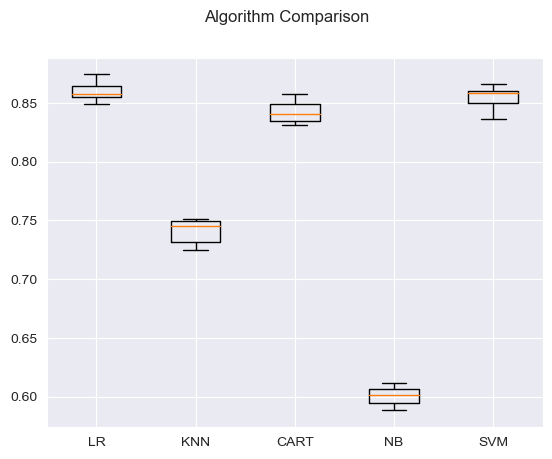

In [40]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Trying ensemble models

In [41]:

ensembles = [
    
    
    ('XGB',  XGBClassifier()),
    ('AB', AdaBoostClassifier()),
    ('GBM', GradientBoostingClassifier()),
    ('RF', RandomForestClassifier()),
    ('ET', ExtraTreesClassifier())
    
]

num_folds = 10
seed = 42

scoring = 'accuracy'

results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})"
    print(msg)

XGB: 0.9048 (0.0036)
AB: 0.4171 (0.0121)
GBM: 0.9042 (0.0065)
RF: 0.8952 (0.0050)
ET: 0.8725 (0.0075)


## Tuning XGBClassifier

In [42]:
# Initialize a basic XGBClassifier
model = XGBClassifier()

# Define a parameter grid for Grid Search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict and evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters found: {grid_search.best_params_}')
print(f'Accuracy of the best model: {accuracy:.4f}')



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Accuracy of the best model: 0.9092


# Final model building

In [43]:
best_model = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.2,
    max_depth=3,
    n_estimators=200,
    subsample=0.8
)

# Fit the model on the training data
best_model.fit(X_train, y_train)

accuracy = best_model.score(X_test, y_test)
print("Accuracy of the best model:", accuracy)


Accuracy of the best model: 0.9092003853564548


## Predicting test data

In [44]:
test_pred=best_model.predict(test)
test_pred

array([5, 6, 6, ..., 4, 4, 5])

In [45]:
submission['encoded_target'] = test_pred
submission

,id,encoded_target
20758,20758,5
20759,20759,6
20760,20760,6
20761,20761,5
20762,20762,6
...,...,...
34593,34593,5
34594,34594,6
34595,34595,4
34596,34596,4


In [46]:
submission.to_csv('Kaggle submission',index=False)

In [49]:
# Encode target classes
mapping = {0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Overweight_Level_I', 
           3: 'Overweight_Level_II', 4: 'Obesity_Type_I', 5: 'Obesity_Type_II', 
           6: 'Obesity_Type_III'}

# Create a new column for the encoded target variable
submission['NObeyesdad'] = submission['encoded_target'].map(mapping)
submission.head()

,id,encoded_target,NObeyesdad
20758,20758,5,Obesity_Type_II
20759,20759,6,Obesity_Type_III
20760,20760,6,Obesity_Type_III
20761,20761,5,Obesity_Type_II
20762,20762,6,Obesity_Type_III


In [51]:
submission.drop('encoded_target',axis=1,inplace=True)
submission.head()

,id,NObeyesdad
20758,20758,Obesity_Type_II
20759,20759,Obesity_Type_III
20760,20760,Obesity_Type_III
20761,20761,Obesity_Type_II
20762,20762,Obesity_Type_III


In [52]:
submission.to_csv('New Kaggle submission',index=False)